In [28]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [29]:
# Read the Data from specified file 
data = pd.read_csv('http://bit.ly/w-data')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


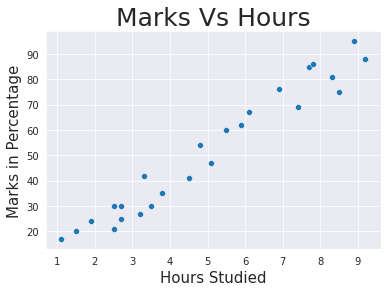

In [30]:
#Lets check Correlation between the 'Marks in Percentage' and 'Hours Studied'.
#Lets plot a regression line to confirm the correlation.
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Hours',size=25)
plt.ylabel('Marks in Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

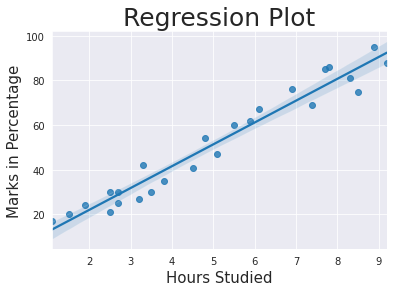

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [32]:
#Lets confirm how the varibles are correlated.
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=25)
plt.ylabel('Marks in Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()
print(data.corr())

In [33]:
#Varibles are positively correlatd
# Training the Data
# Defining X and Y from the Data
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values

# Spliting the Data in two parts
train_X, val_X, train_Y, val_Y = train_test_split(X, Y, random_state = 0)

In [34]:
#Fitting the Data into the model
regression = LinearRegression()
regression.fit(train_X, train_Y)
print("Model Is Trained Now")

Model Is Trained Now


In [35]:
#Predicting the Percentage of Marks
pred_Y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_Y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [36]:
#Comparing the Predicted Marks with the Actual Marks
compare_scores = pd.DataFrame({'Actual Marks': val_Y, 'Predicted Marks': pred_Y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


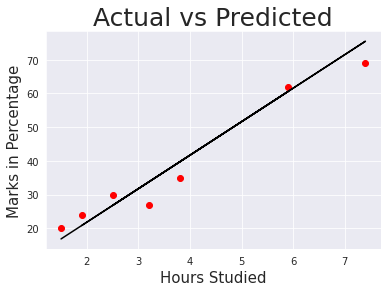

In [37]:
#Visually Comparing the Predicted Marks with the Actual Marks
plt.scatter(x=val_X, y=val_Y, color='red')
plt.plot(val_X, pred_Y, color='black')
plt.title('Actual vs Predicted', size=25)
plt.ylabel('Marks in Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

In [38]:
# Evaluating the Model
# Calculating the accuracy of the model
print('Mean absolute error = ',mean_absolute_error(val_Y,pred_Y))

Mean absolute error =  4.130879918502482


In [39]:
# Question : What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?
hours = [9.25]
answer = regression.predict([hours])
print("Predicted score if a student studies for 9.25 hours is {}".format(round(answer[0],2)))

Predicted score if a student studies for 9.25 hours is 93.89
